In [322]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [323]:
from keras import backend as K
print(K.backend())

tensorflow


In [324]:
# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(256, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [325]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)     │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,258 (3.01 MB)

 Trainable params: 789,258 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [326]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape(50000, 32*32*3).astype("float32") / 255
x_test = x_test.reshape(10000, 32*32*3).astype("float32") / 255

In [327]:

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.AdamW(),
    metrics=["accuracy"]
)

In [328]:
history = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_split=0.15)

Epoch 1/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2678 - loss: 2.1417 - val_accuracy: 0.3292 - val_loss: 1.9015
Epoch 2/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3697 - loss: 1.7763 - val_accuracy: 0.3689 - val_loss: 1.7469
Epoch 3/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3961 - loss: 1.7005 - val_accuracy: 0.3983 - val_loss: 1.6902
Epoch 4/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4162 - loss: 1.6394 - val_accuracy: 0.4332 - val_loss: 1.6228
Epoch 5/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4363 - loss: 1.5999 - val_accuracy: 0.4260 - val_loss: 1.6419
Epoch 6/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4408 - loss: 1.5676 - val_accuracy: 0.4224 - val_loss: 1.6427
Epoch 7/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4468 - loss: 1.5554 - val_accuracy: 0.4419 - val_loss: 1.5954
Epoch 8/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4558 - loss: 1.5316 - val_accuracy: 0.

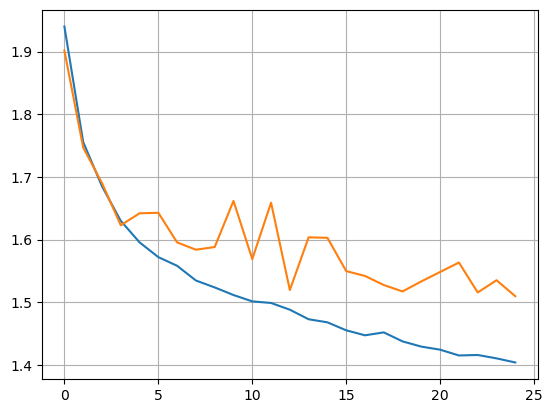

In [329]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [330]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - 1ms/step - accuracy: 0.4739 - loss: 1.4958
Test loss: 1.4957828521728516
Test accuracy: 0.4738999903202057


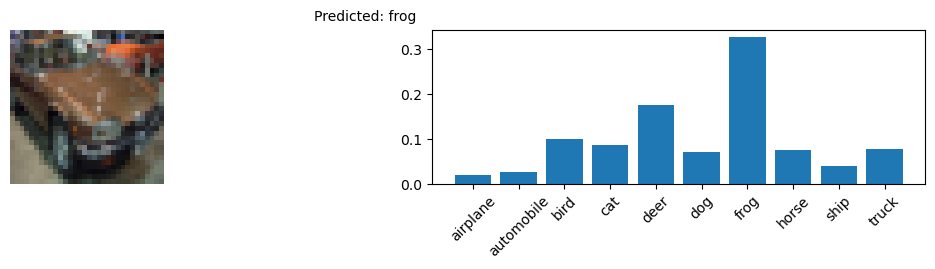

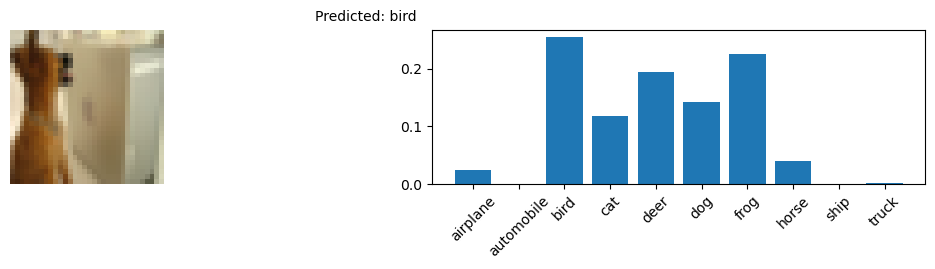

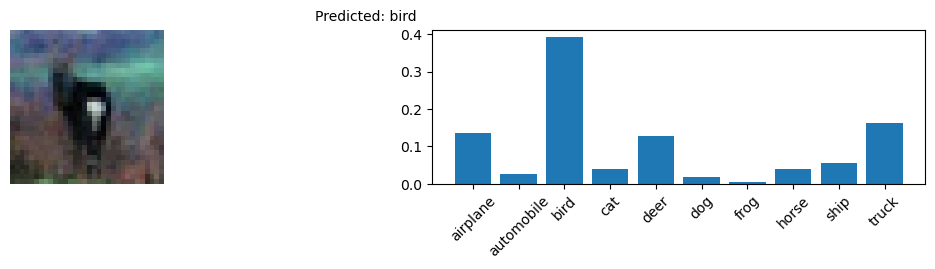

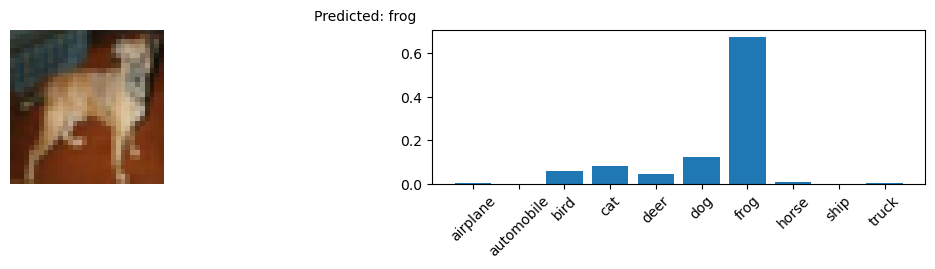

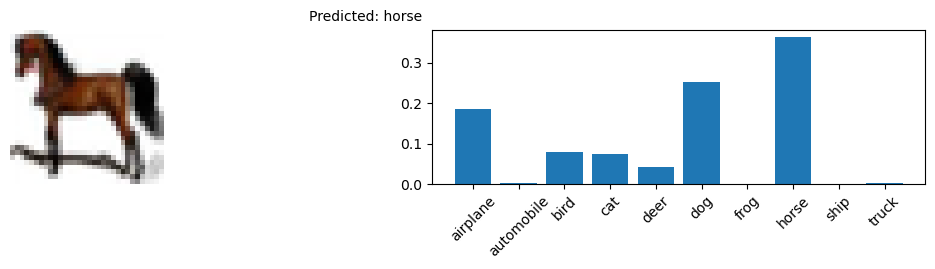

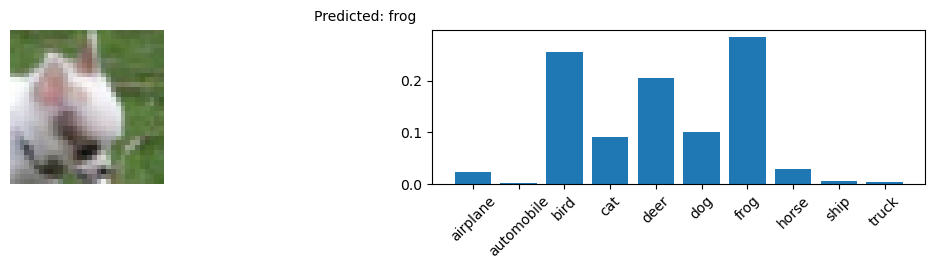

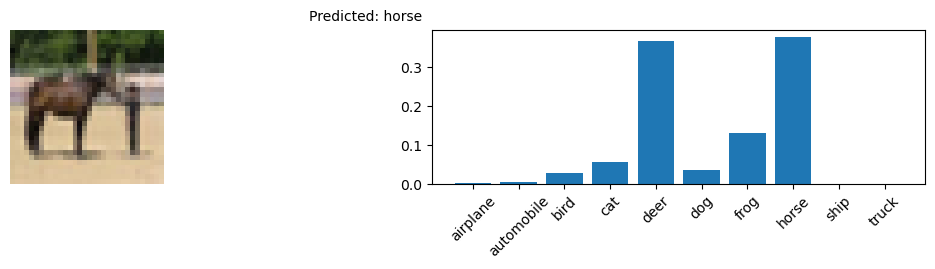

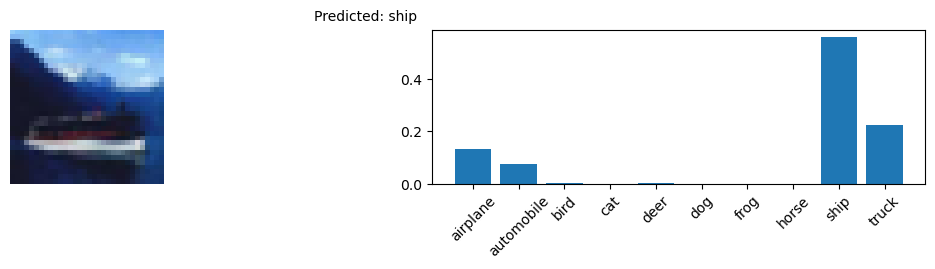

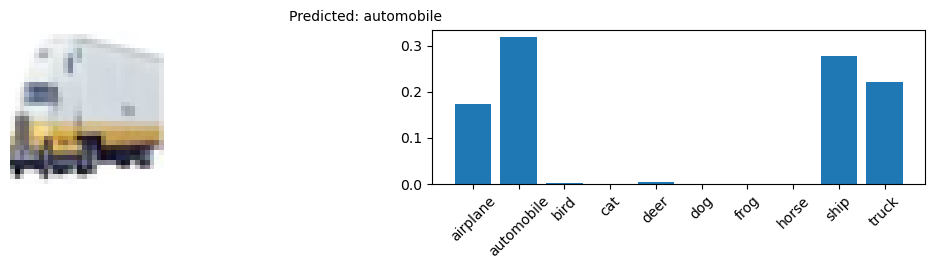

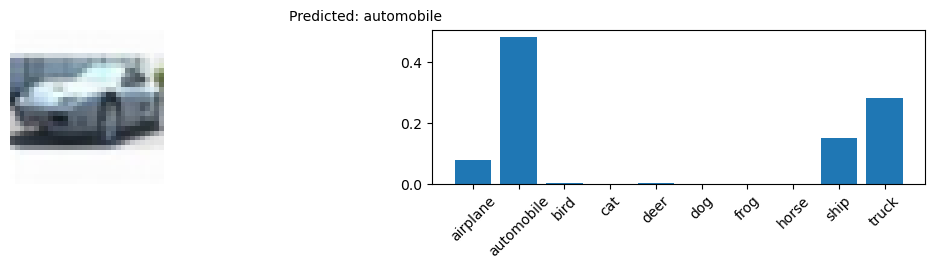

In [331]:
x = x_test
y = model(x)
start = 2000

label_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

for k in range(10):
    plt.figure(figsize=(14, 2))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(x[start + k].reshape((32, 32, 3)))
    plt.axis("off")

    # Display the prediction probabilities
    ind = np.arange(0, 10)
    plt.subplot(1, 2, 2)
    plt.bar(ind, y[start + k].numpy().flatten())  # Flatten prediction array
    plt.xticks(ind, label_names, rotation=45)  # Map labels to class names

    # Find the predicted class with the highest probability
    predicted_class_index = np.argmax(y[start + k].numpy())  # Index of highest probability
    predicted_class = label_names[predicted_class_index]  # Map index to class name

    # Set the title as the predicted class
    plt.suptitle(f"Predicted: {predicted_class}", fontsize=10)

    plt.show()